In [5]:
import sounddevice as sd
import sounddevice as sd
import soundfile as sf
import numpy as np

def record_sound(duration, fs, channels):
    print("Recording...")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
    sd.wait()  # Wait for the recording to complete
    print("Recording finished")
    return recording

# Set the duration, sampling frequency, and number of channels
duration = 4  # Recording duration in seconds
fs = 44100    # Sampling frequency (samples per second)
channels = 2  # Number of audio channels (1 for mono, 2 for stereo)

# Record sound
recording = record_sound(duration, fs, channels)

# Save the recording to a WAV file (optional)
filename = "recorded_sound1.wav"
sf.write(filename, recording, fs)
print(f"Recording saved as {filename}")


Recording...
Recording finished
Recording saved as recorded_sound1.wav


In [6]:
file_path = 'recorded_sound1.wav'

data, sample_rate = sf.read(file_path)

print(f"Sample rate: {sample_rate}")
print(f"Data shape: {data.shape}") 

Sample rate: 44100
Data shape: (176400, 2)


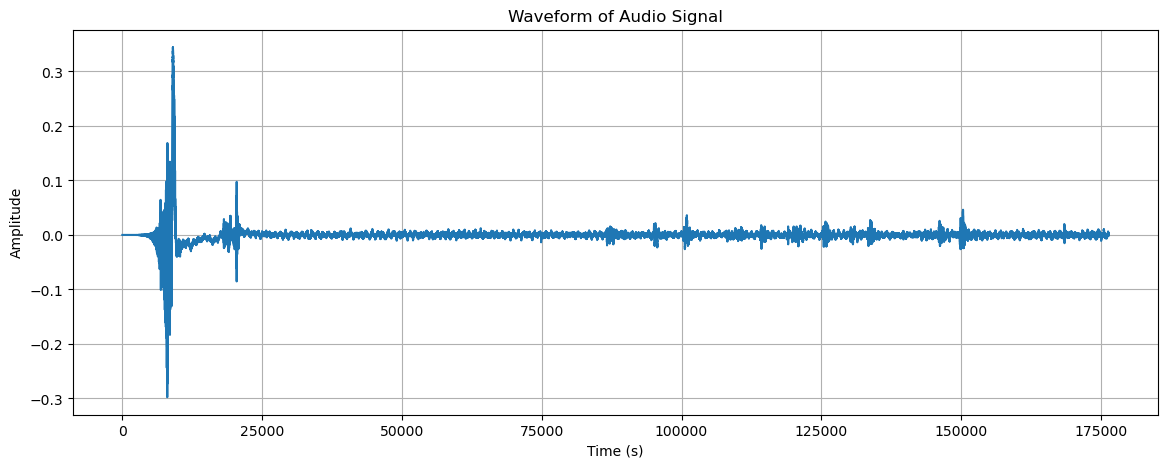

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

waveform, sample_rate = librosa.load(filename, sr=None)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(waveform)
plt.grid()
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

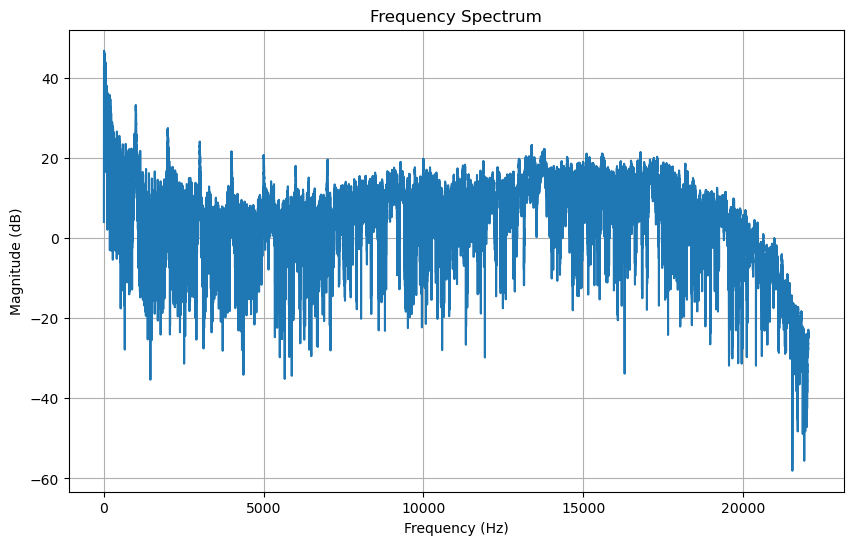

In [8]:
audio_channel = data[:, 0] if len(data.shape) > 1 else data

# Perform FFT
fft_result = np.fft.fft(audio_channel)
magnitude = np.abs(fft_result)
frequency = np.linspace(0, sample_rate, len(magnitude))

# Plot the frequency graph
plt.figure(figsize=(10, 6))
plt.plot(frequency[:len(frequency)//2], 20 * np.log10(magnitude[:len(magnitude)//2]))  # Plot half of the spectrum (to avoid mirror effect)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Spectrum')
plt.grid()
plt.show()

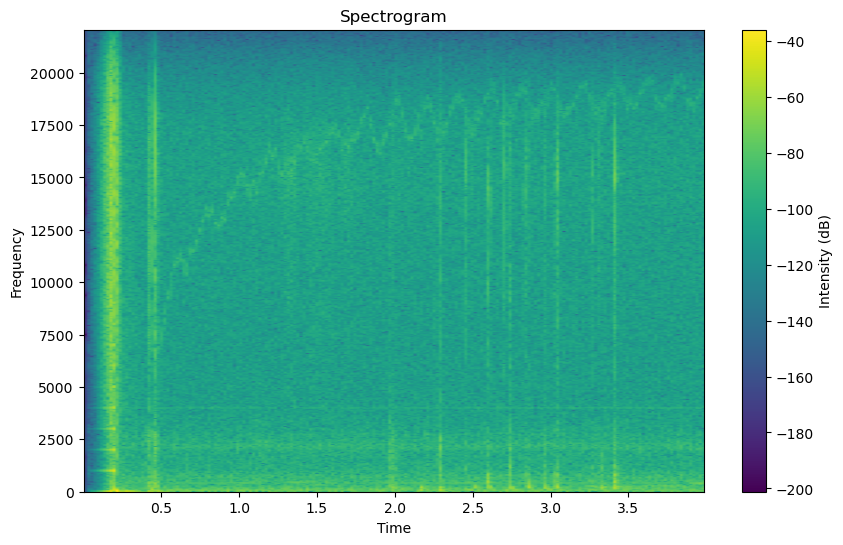

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.specgram(data[:, 0], Fs=sample_rate, NFFT=1024, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.colorbar(label='Intensity (dB)')
plt.show()
